### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Loading the Data

In [2]:
df = pd.read_csv('data/processed/7_feature_scaled.csv')
df

,Contract,MonthlyCharges,TotalCharges,Churn,ServiceAdoptionScore,AvgChargePerService,TenureBins,gender_Male,SeniorCitizen_1,Partner_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentReliabilityIndicator_Unreliable
0,0,-1.160323,-0.994971,0,1,-0.749701,0,False,False,True,...,False,False,False,False,False,False,False,False,True,True
1,1,-0.259629,-0.173876,0,2,-0.461719,1,True,False,False,...,False,True,False,False,False,False,False,False,False,True
2,0,-0.362660,-0.960399,1,2,-0.535045,0,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,1,-0.746535,-0.195400,0,3,-1.058380,1,True,False,False,...,False,True,False,True,False,False,False,False,False,False
4,0,0.197365,-0.941193,1,0,3.208130,0,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.665992,-0.129281,0,5,-0.805878,1,True,False,True,...,False,True,False,True,False,True,False,True,True,True
7039,1,1.277533,2.242808,0,4,-0.344161,2,False,False,True,...,False,True,False,False,False,True,False,True,True,False
7040,0,-1.168632,-0.855182,0,1,-0.758571,0,False,False,True,...,False,False,False,False,False,False,False,False,True,True
7041,0,0.320338,-0.872777,1,0,3.470685,0,True,True,True,...,False,False,False,False,False,False,False,False,True,True


### Checking for Class Imbalance

Text(0.5, 1.0, 'Class Distribution of Churn')

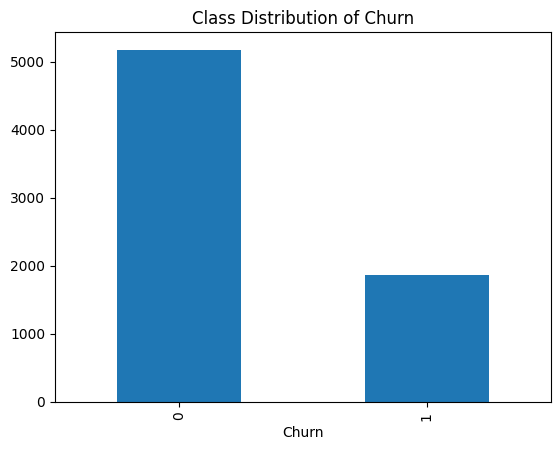

In [3]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Churn')

### Splitting the Data

In [4]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Apply SMOTE

In [6]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
np.savez('artifacts/X_train.npz', X_train_resampled)
np.savez('artifacts/y_train.npz', y_train_resampled)
np.savez('artifacts/X_test.npz', X_test)
np.savez('artifacts/y_test.npz', y_test)